# Ridge Regression - Theory

- These methods seek to alleviate the consequences of multi-collinearity, poorly conditioned equations, and overfitting.
- When variables are *highly correlated*, a larget coefficient in one variable may be alleviated by a large coefficient in another variable

**The objective function**

$$
\hat{\theta}_{\text{ridge}} = \text{argmin}_{\theta \in \mathbb{R}} \sum_{i=1}^{m} \left ( y_{i} - x_{i}^{T}\theta \right )^{2} + \lambda \sum_{j=1}^{n} \theta_{j}^{2}
$$

- This is strictly convex function.
- Because the Hessian matrix is positive definite

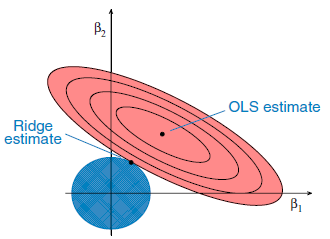

- Ridge regression has closed solution (by derivative equals to zero)
$$
\hat{\theta}_{\text{ridge}} = \left ( X^{T}X + \lambda I \right ) ^{-1} X^{T} y
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

**Dataset**

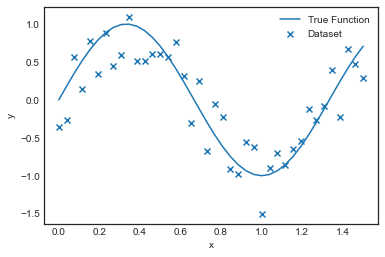

In [76]:
m = 40  # number of data

x = np.linspace(0, 1.5, m)
y = np.sin(x*1.5*np.pi)

y_noise = y + np.random.uniform(size=m)
y_noise -= y_noise.mean()

# Plot
plt.scatter(x, y_noise, label='Dataset', marker='x')
plt.plot(x, y, label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Solve by Closed Solution**

- using polynom function ordo-12

$$
\hat{y} = \theta_{0} + \theta_{1} x + \cdots + \theta_{12} x^{12}
$$

In [91]:
# Design matrix
n = 13
X = []
for i in range(n):
    X.append(x**i)
    
X = np.array(X).T

**OLS Solution**

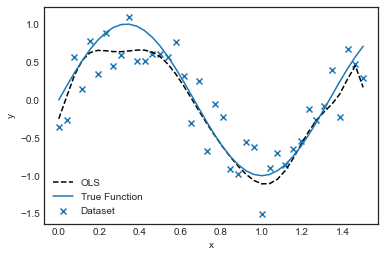

In [92]:
# Solve for theta
theta_ols = np.linalg.inv(X.T @ X) @ X.T @ y_noise

# Plot
y_ols = X @ theta_ols
plt.scatter(x, y_noise, label='Dataset', marker='x')
plt.plot(x, y_ols, '--k', label='OLS')
plt.plot(x, y, label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Ridge - Closed Solution**

theta = [-0.26  6.06 -9.69  2.39 -0.82 -1.66  0.95  2.83  1.61 -1.4  -2.23  1.43
 -0.15]
lambda : 0.01 ~ 0.07895 : 1/ridge_radius


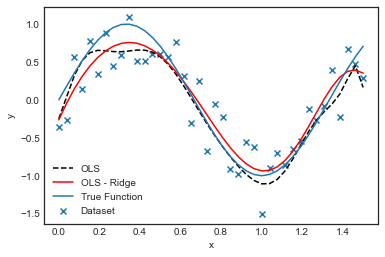

In [161]:
# Solve for theta
lamda = 1e-2  # pilih sendiri
p_inv_ridge = np.linalg.inv(X.T @ X + (lamda**2)*np.eye(n))
theta_ridge = p_inv_ridge @ X.T @ y_noise
ridge_radius = np.sqrt(theta_ridge @ theta_ridge)

print(f"theta = {np.round(theta_ridge, 2)}")
print(f"lambda : {np.round(lamda,5)} ~ {np.round(1/ridge_radius,5)} : 1/ridge_radius")


# Plot
y_ridge = X @ theta_ridge
plt.scatter(x, y_noise, label='Dataset', marker='x')
plt.plot(x, y_ols, '--k', label='OLS')
plt.plot(x, y_ridge, 'r', label='OLS - Ridge')
plt.plot(x, y, label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

- $\lambda = 0$ -> becomes OLS solution
- $\lambda = \infty$ -> all $\theta = 0$

theta = [-2.500000e-01  6.320000e+00  5.279000e+01 -6.488600e+02  1.944450e+03
  1.330540e+03 -2.196214e+04  6.072004e+04 -8.821450e+04  7.654188e+04
 -3.989114e+04  1.155050e+04 -1.430740e+03]
lambda : 0 ~ 1e-05 : 1/ridge_radius


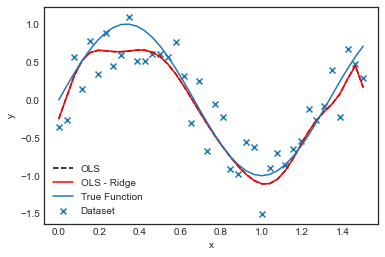

In [106]:
# Solve for theta
lamda = 0  # pilih sendiri
p_inv_ridge = np.linalg.inv(X.T @ X + (lamda**2)*np.eye(n))
theta_ridge = p_inv_ridge @ X.T @ y_noise
ridge_radius = np.sqrt(theta_ridge @ theta_ridge)

print(f"theta = {np.round(theta_ridge, 2)}")
print(f"lambda : {np.round(lamda,5)} ~ {np.round(1/ridge_radius,5)} : 1/ridge_radius")


# Plot
y_ridge = X @ theta_ridge
plt.scatter(x, y_noise, label='Dataset', marker='x')
plt.plot(x, y_ols, '--k', label='OLS')
plt.plot(x, y_ridge, 'r', label='OLS - Ridge')
plt.plot(x, y, label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

theta = [-0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.]
lambda : 1e+16 ~ 7.291815361513663e+29 : 1/ridge_radius


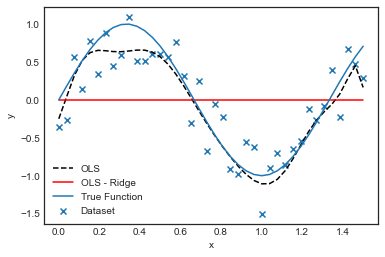

In [107]:
# Solve for theta
lamda = 1e16  # pilih sendiri
p_inv_ridge = np.linalg.inv(X.T @ X + (lamda**2)*np.eye(n))
theta_ridge = p_inv_ridge @ X.T @ y_noise
ridge_radius = np.sqrt(theta_ridge @ theta_ridge)

print(f"theta = {np.round(theta_ridge, 2)}")
print(f"lambda : {np.round(lamda,5)} ~ {np.round(1/ridge_radius,5)} : 1/ridge_radius")


# Plot
y_ridge = X @ theta_ridge
plt.scatter(x, y_noise, label='Dataset', marker='x')
plt.plot(x, y_ols, '--k', label='OLS')
plt.plot(x, y_ridge, 'r', label='OLS - Ridge')
plt.plot(x, y, label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Ridge - Gradient Descent**

In [163]:
def cost_func_ridge(X, y, theta, lamda):
    '''Cost function for ridge regression'''
    # initialization
    m = len(y)
    J = 0
    
    # Vectorized implementation
    h = X @ theta
    J_reg = (lamda) * (np.sum(np.square(theta)))
    J = (((h-y) @ (h-y)) + J_reg) * (1/(2*m))
    
    return J

def grad_cost_func_ridge(X, y, theta, lamda):
    '''Grad of cost function for ridge regression'''
    # initialization
    m = len(y)
    J = 0
    
    # Vectorized implementation
    h = X @ theta
    grad = (-(X.T @ (y-h)) + (lamda**2)*theta) * (1/m)
    
    return grad

def gradient_descent_ridge(X, y, theta, lamda,
                           alpha = 0.0005, num_iters=1000):
    '''Gradient descent'''
    # Intialization
    m = len(y)
    J_history = []
    theta_hist = []
    
    for i in range(num_iters):
        # Cost function
        current_J = cost_func_ridge(X, y, theta, lamda)
        J_history.append(current_J)
        
        # Find new theta
        grad_J = grad_cost_func_ridge(X, y, theta, lamda)
        theta -= alpha * grad_J
        theta_hist.append(theta)
        
    return theta, J_history, theta_hist
        

theta = [-0.15  4.2  -3.67 -3.23 -1.32  0.38  1.38  1.59  1.06  0.07 -0.91 -1.09
  0.7 ]
lambda : 0.01 ~ 0.13926 : 1/ridge_radius


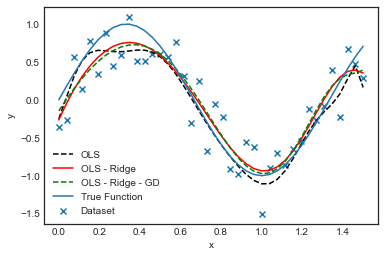

In [187]:
theta_init = 2. * np.ones(n)
theta_final, J_history, theta_hist = gradient_descent_ridge(X, y_noise, theta=theta_init, 
                                                            lamda=1e-2, 
                                                            alpha=1e-3,
                                                            num_iters=5000000)
ridge_radius = np.sqrt(theta_final @ theta_final)
print(f"theta = {np.round(theta_final, 2)}")
print(f"lambda : {np.round(lamda,5)} ~ {np.round(1/ridge_radius,5)} : 1/ridge_radius")

# Plot
y_ridge_gd = X @ theta_final
plt.scatter(x, y_noise, label='Dataset', marker='x')
plt.plot(x, y_ols, '--k', label='OLS')
plt.plot(x, y_ridge, 'r', label='OLS - Ridge')
plt.plot(x, y_ridge_gd, '--g', label='OLS - Ridge - GD')
plt.plot(x, y, label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [188]:
print(cost_func_ridge(X, y_noise, theta_ridge, lamda=1e-2))
print(cost_func_ridge(X, y_noise, theta_final, lamda=1e-2))

0.054308786325797255
0.0416585379451912
